	
<h1>Assignment 2</h1>
    
    

<h2>Importing liberaries</h2>

In [121]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

<h2>Part 1: preliminary data analysis and pre-treatment</h2>

<h4>Copying the data in a dataframe</h4>

In [144]:
df = pd.read_excel('Movement_dataset_v2.xlsx')
df.tail(5)
info= df.loc[:,['Subject ID', 'Activity ID','Time stamp']]
df_info=pd.DataFrame(info)
df_info.columns =['Subject ID','Activity ID', 'Time Stamp']


,Subject ID,Activity ID,Time Stamp
0,1,1,1
1,1,1,2
2,1,1,3
3,1,1,4
4,1,1,5
...,...,...,...
1195,10,4,26
1196,10,4,27
1197,10,4,28
1198,10,4,29


<h4> Check the correlation</h4>

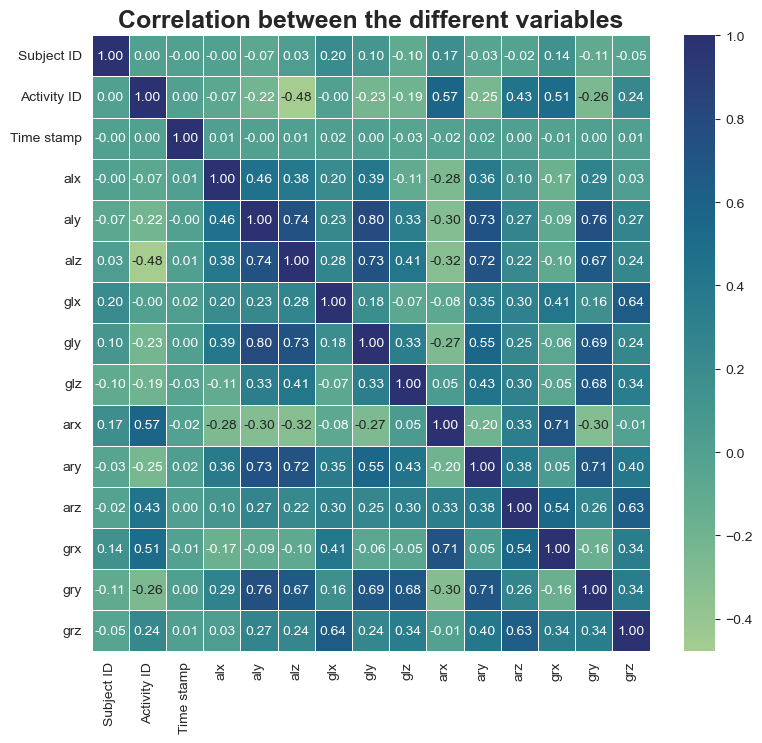

In [199]:
df_correlated=df.corr()
f, ax = plt.subplots(figsize=(9, 8))
sns.heatmap(data=df_correlated, annot=True, fmt=".2f", linewidths=.5, ax=ax,cmap="crest")
ax.set_title('Correlation between the different variables', size=18, weight='bold')
fig = ax.get_figure()
fig.savefig("Heatmap")

<h4>Check for missing values<h/4>

In [147]:
print(df.isnull().sum())

Subject ID     0
Activity ID    0
Time stamp     0
alx            0
aly            0
alz            0
glx            0
gly            0
glz            0
arx            0
ary            0
arz            0
grx            0
gry            0
grz            0
dtype: int64


<h4> Check for duplicate rows </h4>

In [175]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Subject ID, Activity ID, Time stamp, alx, aly, alz, glx, gly, glz, arx, ary, arz, grx, gry, grz]
Index: []


<h2>Part 2: Principal Component Analysis</h2>

<h4>Scaling the data</h4>

The data is scaled using the MinMaxscaler from skylearn. The rows containing the timestamp, subject ID and activity ID are dropped, since they aren't useful while performing PCA

In [200]:
scaler = MinMaxScaler()
model= scaler.fit(df)
df_scaled=pd.DataFrame(model.transform(df))
df_scaled=df_scaled.drop(columns=[0 , 1, 2])
df_scaled.columns=['alx', 'aly', 'alz', 'glx', 'gly','glz','arx','ary','arz','grx','gry', 'grz']


<h4> Performing PCA</h4>

In [128]:
pca = PCA(n_components=12)
principalComponents = pca.fit_transform(df_scaled)

principalDf = pd.DataFrame(data = principalComponents)

principalDf

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.034083,0.436245,0.047681,0.036327,0.014445,-0.229093,-0.058147,0.057969,-0.051098,-0.054770,-0.011828,-0.011490
1,-0.040319,0.437607,0.044179,0.025039,0.013128,-0.234508,-0.054405,0.075644,-0.050956,-0.057249,-0.011319,-0.015835
2,-0.035443,0.427656,0.038991,0.026231,0.022741,-0.238479,-0.056059,0.057547,-0.049930,-0.052192,-0.009148,-0.016337
3,-0.035288,0.429997,0.036781,0.025050,0.019189,-0.236723,-0.059195,0.063848,-0.049936,-0.055608,-0.012593,-0.016561
4,-0.030976,0.436969,0.036604,0.030171,0.019242,-0.230249,-0.059363,0.051450,-0.045385,-0.050173,-0.009093,-0.017865
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,-0.022773,0.659740,-0.143772,-0.033702,-0.047292,0.214764,0.130326,0.179250,0.032446,0.049002,-0.071137,0.014992
1196,-0.063362,0.615228,-0.112808,0.012954,-0.035282,0.121158,0.128349,0.115560,0.031615,0.001191,-0.067509,0.001862
1197,-0.058165,0.568368,-0.074524,0.049486,0.051041,0.078578,0.105171,0.007075,0.070018,-0.007720,-0.040154,0.011311
1198,-0.143781,0.576091,-0.030652,0.076212,-0.044745,-0.009179,0.155317,0.073819,0.008697,-0.043950,-0.003910,-0.040294


<h4> Explained variance ratio </h4>

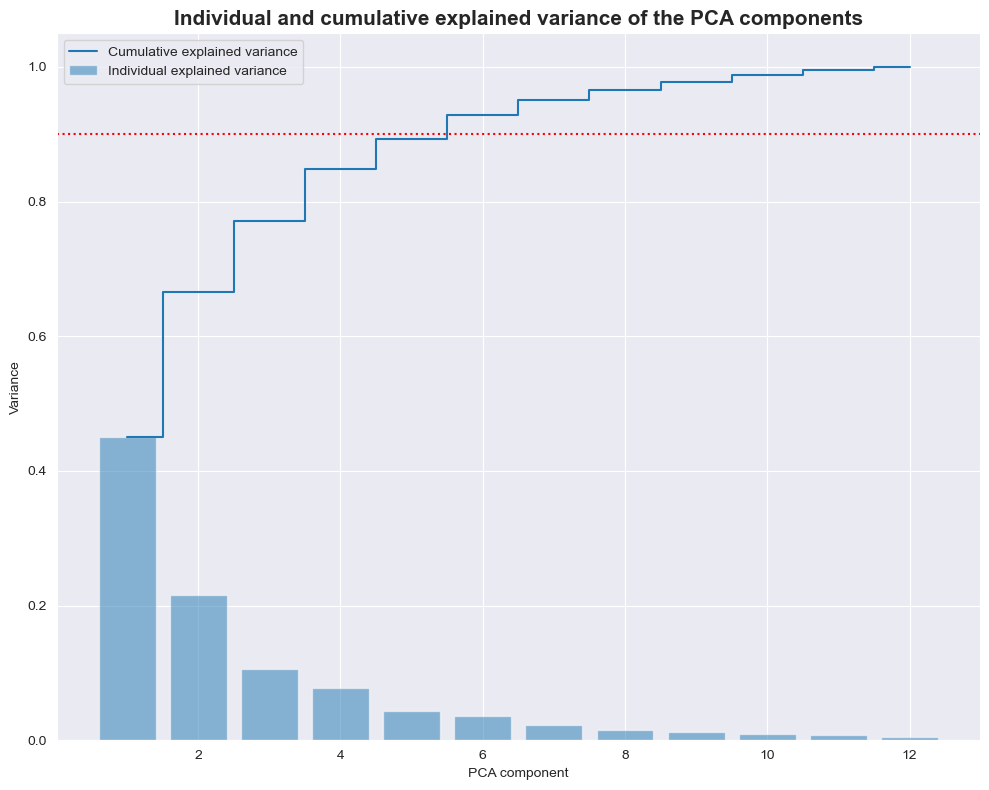

In [236]:
variance= pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(variance)
f, ax3 = plt.subplots(figsize=(10, 8))
ax3.bar(range(1,len(variance)+1), variance, alpha=0.5, align='center', label='Individual explained variance')
ax3.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
ax3.set_xlabel('PCA component')
ax3.set_ylabel('Variance')
ax3.set_title('Individual and cumulative explained variance of the PCA components', size=15, weight='bold')
ax3.legend()
ax3.axhline(y=0.9,color= 'r', linestyle=':')
plt.tight_layout()
fig = ax3.get_figure()
fig.savefig("Variance")


,Subject ID,Activity ID,Time Stamp
0,1,1,1
1,1,1,2
2,1,1,3
3,1,1,4
4,1,1,5
...,...,...,...
1195,10,4,26
1196,10,4,27
1197,10,4,28
1198,10,4,29


In [131]:
df_PCA1=pd.concat([df_info, principalDf], axis = 1)
df_PCA2=df_PCA1.drop(columns=[6,7,8,9,10,11])
df_PCA2.columns=['Subject ID','Activity ID', 'Time Stamp','PC 1','PC 2','PC 3','PC 4','PC 5','PC 6']
df_PCA2.head()

,Subject ID,Activity ID,Time Stamp,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
0,1,1,1,-0.034083,0.436245,0.047681,0.036327,0.014445,-0.229093
1,1,1,2,-0.040319,0.437607,0.044179,0.025039,0.013128,-0.234508
2,1,1,3,-0.035443,0.427656,0.038991,0.026231,0.022741,-0.238479
3,1,1,4,-0.035288,0.429997,0.036781,0.025050,0.019189,-0.236723
4,1,1,5,-0.030976,0.436969,0.036604,0.030171,0.019242,-0.230249


<h4> Determine the loadings </h4>

In [132]:
loadings= pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(1,len(principalDf.columns)+1)],
index=df_scaled.columns)
print(loadings)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
alx  0.062356 -0.040021  0.155468 -0.023896  0.003734  0.169094  0.061560   
aly  0.365885 -0.151991  0.212082 -0.170329  0.014297  0.192772  0.310276   
alz  0.282662 -0.112487  0.137157 -0.066119  0.162222 -0.008323 -0.643178   
glx  0.210691  0.481433  0.463271  0.325769  0.248993 -0.343937 -0.013434   
gly  0.439722 -0.206725  0.265746 -0.369215 -0.508839 -0.322197 -0.148183   
glz  0.271816 -0.102441 -0.677428  0.155476  0.110491 -0.350322 -0.266371   
arx -0.051196  0.148461 -0.191659 -0.305373  0.109119 -0.108064  0.020065   
ary  0.350375 -0.012029  0.044138 -0.003130  0.541961  0.443661 -0.167172   
arz  0.191068  0.317378 -0.253091 -0.263870 -0.248605  0.527028 -0.060238   
grx  0.027157  0.520583 -0.098475 -0.582351  0.237295 -0.264249  0.133622   
gry  0.465804 -0.219491 -0.193098  0.121649  0.167042 -0.132442  0.585946   
grz  0.301846  0.485324 -0.134792  0.427324 -0.434392  0.125332 -0.002065   

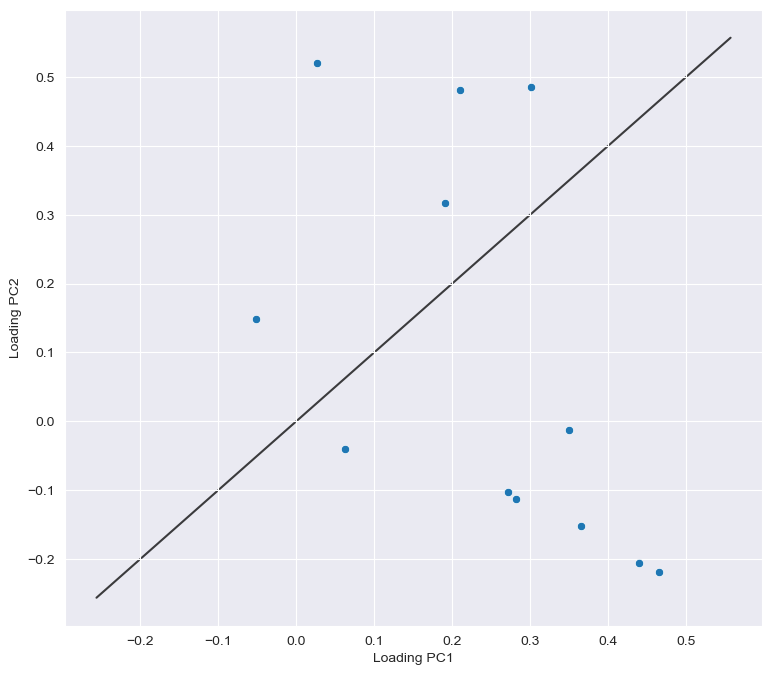

In [240]:
f, ax1 = plt.subplots(figsize=(9, 8))
sns.scatterplot(x=loadings['PC1'], y=loadings['PC2'], ax=ax1)
ax1.set_xlabel('Loading PC1')
ax1.set_ylabel('Loading PC2')

lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  
]

ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)


Text(0.5, 1.0, 'Scatterplot of the values of PC1 and PC2, colored by the different activities')

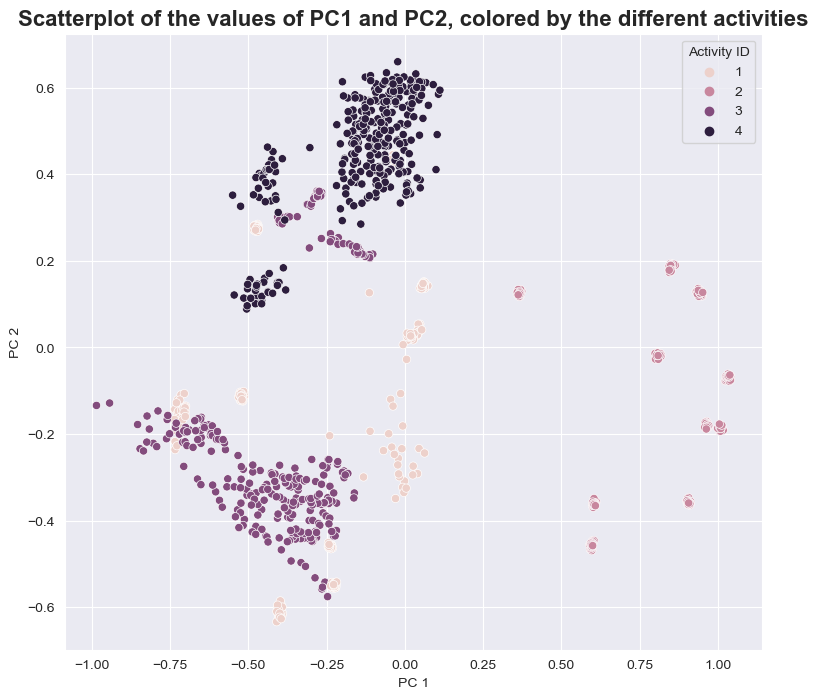

In [197]:
f, ax2 = plt.subplots(figsize=(9, 8))
colors = ['red', 'blue', 'yellow', 'green']

sns.scatterplot(x=df_PCA2['PC 1'], y=df_PCA2['PC 2'],
             hue= df_PCA2['Activity ID'], ax=ax2)
ax2.set_title('Scatterplot of the values of PC1 and PC2, colored by the different activities', weight='bold', size=16)


